In [1]:
import os
import numpy as np
import cv2
from keras.preprocessing.image import img_to_array, load_img
from sklearn.utils import shuffle
from keras.utils import to_categorical

In [13]:
train = r'C:\Users\bugra\Desktop\DerinOgrenme\images\images\train'
validation = r'C:\Users\bugra\Desktop\DerinOgrenme\images\images\validation'

# Klasör isimlerini al
train_names = sorted(os.listdir(train))
validation_names = sorted(os.listdir(validation))

# Kategorileri yazdır
print("Training Categories:")
for i in train_names:
    print(i)
print("\nValidation Categories:")
for i in validation_names:
    print(i)

Training Categories:
happy
sad

Validation Categories:
happy
sad


In [14]:
# Eğitim ve doğrulama veri yollarını oluştur
train_image_paths = [os.path.join(train, category, image) for category in train_names for image in os.listdir(os.path.join(train, category))]
validation_image_paths = [os.path.join(validation, category, image) for category in validation_names for image in os.listdir(os.path.join(validation, category))]

# Eğitim ve doğrulama veri yollarını karıştır
np.random.shuffle(train_image_paths)
np.random.shuffle(validation_image_paths)

# Verileri yükleme ve etiketleme
train_images = []
train_labels = []

validation_images = []
validation_labels = []

In [15]:
for image_path in train_image_paths:
    image = cv2.imread(image_path)
    image = cv2.resize(image, (48, 48))
    image = img_to_array(image)
    train_images.append(image)
    
    label = train_names.index(image_path.split(os.path.sep)[-2])
    train_labels.append(label)

for image_path in validation_image_paths:
    image = cv2.imread(image_path)
    image = cv2.resize(image, (48, 48))
    image = img_to_array(image)
    validation_images.append(image)
    
    label = validation_names.index(image_path.split(os.path.sep)[-2])
    validation_labels.append(label)

In [16]:
# Verileri NumPy dizisine dönüştürme
train_images = np.array(train_images, dtype="float32") / 255.0
train_labels = np.array(train_labels)

validation_images = np.array(validation_images, dtype="float32") / 255.0
validation_labels = np.array(validation_labels)

# Etiketleri one-hot kodlamaya dönüştürme
train_labels = to_categorical(train_labels)
validation_labels = to_categorical(validation_labels)

In [17]:
from keras import layers, models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # Dropout katmanı eklendi
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # Dropout katmanı eklendi
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # Dropout katmanı eklendi
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # Dropout katmanı eklendi
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))  # Yoğun katman eklendi
model.add(layers.Dropout(0.5))  # Dropout katmanı eklendi
model.add(layers.Dense(2, activation='softmax'))

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])

In [19]:
history = model.fit(
    train_images, train_labels,
    epochs=50,
    batch_size=128,
    validation_data=(validation_images, validation_labels)
)


Epoch 1/50
95/95 [==============================] - 13s 125ms/step - loss: 0.6783 - accuracy: 0.5876 - val_loss: 0.6705 - val_accuracy: 0.6157
Epoch 2/50
95/95 [==============================] - 12s 125ms/step - loss: 0.6706 - accuracy: 0.5992 - val_loss: 0.6804 - val_accuracy: 0.6120
Epoch 3/50
95/95 [==============================] - 12s 126ms/step - loss: 0.6515 - accuracy: 0.6209 - val_loss: 0.6329 - val_accuracy: 0.6538
Epoch 4/50
95/95 [==============================] - 12s 125ms/step - loss: 0.6277 - accuracy: 0.6477 - val_loss: 0.5907 - val_accuracy: 0.6869
Epoch 5/50
95/95 [==============================] - 12s 129ms/step - loss: 0.5784 - accuracy: 0.6964 - val_loss: 0.5660 - val_accuracy: 0.6987
Epoch 6/50
95/95 [==============================] - 11s 117ms/step - loss: 0.4908 - accuracy: 0.7557 - val_loss: 0.4470 - val_accuracy: 0.7824
Epoch 7/50
95/95 [==============================] - 11s 112ms/step - loss: 0.4296 - accuracy: 0.7988 - val_loss: 0.3668 - val_accuracy: 0.8313

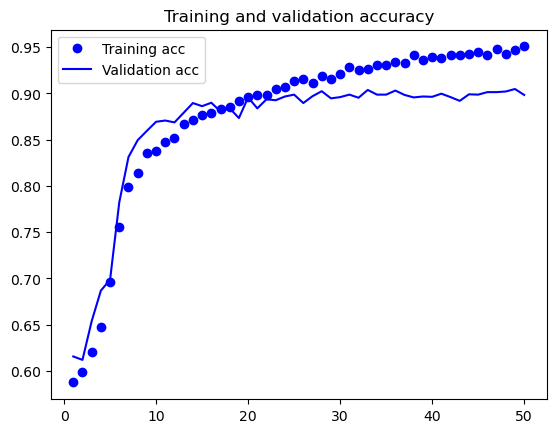

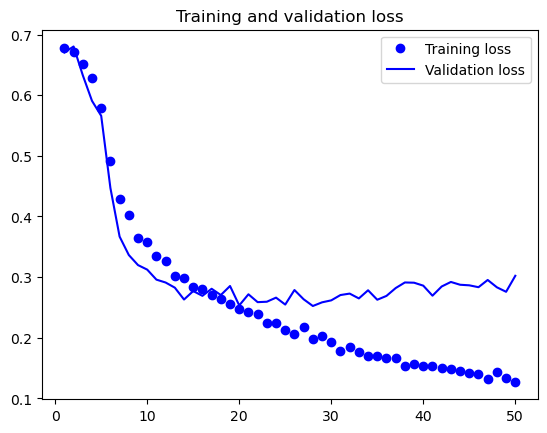

In [21]:
# Eğitim sonuçlarını görselleştirme
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Modeli kaydetme
model.save("model_with_dropout.keras")

In [3]:
import cv2
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from keras.applications.mobilenet_v2 import preprocess_input
from keras.preprocessing.image import load_img

# Modeli yükle
model_path = "model_with_dropout.keras"
model = load_model(model_path)

# Webcam'den görüntü almak için bir VideoCapture nesnesi oluştur
cap = cv2.VideoCapture(0)

# Görüntü üzerine yazılacak metin için font ve renk
font = cv2.FONT_HERSHEY_SIMPLEX
color = (0, 255, 0)  # Yeşil renk

while True:
    # Görüntü al
    ret, frame = cap.read()
    
    # Modelin girdi boyutuna yeniden boyutlandır
    resized_frame = cv2.resize(frame, (48, 48))
    
    # Görüntüyü modelin girdi formatına dönüştürmek için uygun hale getir
    input_image = resized_frame.astype(np.float32) / 255.0
    input_image = np.expand_dims(input_image, axis=0)
    
    # Modeli kullanarak tahmin yap
    prediction = model.predict(input_image)
    
    # Tahmini al
    predicted_class = np.argmax(prediction)
    
    # Sınıf etiketlerini belirle (örneğin, 0 mutlu, 1 üzgün)
    class_labels = ["Happy", "Sad"]
    
    # Tahmini görüntü üzerine yazdır
    cv2.putText(frame, class_labels[predicted_class], (50, 50), font, 1, color, 2)
    
    # Görüntüyü göster
    cv2.imshow('Webcam', frame)
    
    # Çıkış için 'q' tuşuna basın
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Kamerayı bırak ve pencereyi kapat
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 26ms/step
